<h1>Assignment 1</h1>

David Siegl

In [29]:
import numpy as np
import seaborn as sns
import pandas as pd
import tweepy
import oauth2 as oauth
import matplotlib.pyplot as plt
from datetime import datetime

In [30]:
api_key = "X"
api_secret = "X"
access_token_key = "X-X"
access_token_secret = "X"

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token_key, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [155]:
tweets_list = tweepy.Cursor(api.search_tweets, q="#formula1", tweet_mode='extended').items(200)

In [156]:
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    language = tweet.lang
    is_retweet = tweet.retweeted
    user_name = tweet.user.screen_name
    
    line = {"text" : text, "favourite_count" : favourite_count, "retweet_count" : retweet_count, "created_at" : created_at, "language" : language, "is_retweet": is_retweet, "user_name" : user_name}
    output.append(line)
    
df = pd.DataFrame(output)

In [157]:
df.to_csv("tweets_formula1.csv", header = ["text", "favourite_count", "retweet_count", "created_at", "language", "is_retweet", "user_name"])

In [158]:
df = pd.read_csv("tweets_formula1.csv", index_col = 0)

In [159]:
df.groupby(["language"])["language"].count()

language
ar       2
de       2
en     116
es      23
fr       6
in      33
it       2
nl       2
pt       5
tl       1
tr       6
und      2
Name: language, dtype: int64

In [160]:
df2 = df.loc[(df["language"]=="en") | (df["language"]=="es") | (df["language"]=="it") | (df["language"]=="tr")]
df2

,text,favourite_count,retweet_count,created_at,language,is_retweet,user_name
1,RT @TheUndercut2: WHAT. A. RACE!!!!! Can't wai...,0,1,2022-03-22 15:08:49+00:00,en,False,THC_IPA
4,RT @motorlat: ⁉️ Ha transcurrido la primera ca...,0,5,2022-03-22 15:08:42+00:00,es,False,marcelotade
5,"We operate in state-of-the-art, vacuum coating...",0,0,2022-03-22 15:07:30+00:00,en,False,Diamondcoatings
6,Represent! @racerbia 👏🏻 \n#WSeries #Formula1 h...,0,0,2022-03-22 15:06:34+00:00,en,False,F1Philippines
8,Hoy volvemos a twitch! Esta noche toca F1!\n\n...,0,0,2022-03-22 15:05:52+00:00,es,False,el_Clausulazo
...,...,...,...,...,...,...,...
194,RT @TheOneAndOniii: 📣 F1 Race predictions💭💭🤔\n...,0,1,2022-03-22 14:18:17+00:00,en,False,f1fantwo
195,RT @racingsocialnft: Guys today we have an AMA...,0,155,2022-03-22 14:18:07+00:00,en,False,1234567Bt21
197,RT @Formula1arg1: #SaudiArabianGP🇸🇦 | 🚨Según e...,0,19,2022-03-22 14:17:47+00:00,es,False,Formula1arg1
198,RT @racingsocialnft: Guys today we have an AMA...,0,155,2022-03-22 14:17:46+00:00,en,False,Drmdwn


<AxesSubplot:xlabel='language', ylabel='retweet_count'>

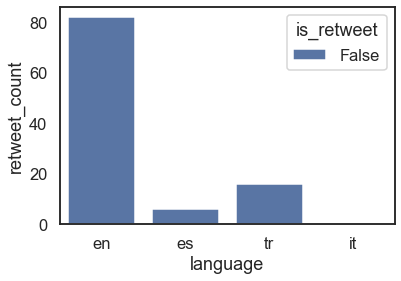

In [161]:
sns.set_theme(style="white", context="talk")
sns.barplot(data = df2, x = "language", y = "retweet_count", hue = "is_retweet", ci=None)

In [162]:
rt_tweets = df.nlargest(10, "favourite_count")
for i in range(9):
    print("-) " + rt_tweets["text"].iloc[i])

-) 👤 Christian Horner

🎙 "Bence Ferrari, yarışta bize kıyasla biraz daha hızlıydı. Fakat olumlu taraftan bakarsak, sıralama turlarında ilk çizgi için yarışabilecek, Charles'la galibiyet için çekişecek bir aracımız var."

#Formula1 https://t.co/ZpUoIpol1D
-) Sorry guys... Still i rise
Remeber Fortune Favor The Brave
@LoadedLions_CDC @cryptocom @cryptocomnft 
#LoadedLions #cryptocom #cdc #cro #FFTB #nft #crypto #formula1 @F1 #F1 https://t.co/xgKHvrRwY9
-) #F1 | #Schumacher: "Dopo il testacoda non ero più a mio agio"

#Formula1 | #BahrainGP | #HaasF1 
https://t.co/VVnEtH6MJB
-) Not Max roasting Alex's fashion choices 😭

#F1 #Formula1 #MaxVerstappen #AlexAlbon #redbullracing #RedBull https://t.co/la9KF1QRHo
-) Bölüm 10 - #BahrainGP yayında!

🏁 2022 beklentileri ve #BahrainGP
🏎 Sana “Kırmızı” çok yakışıyor…
👁 Yarına kalsa da Yanına kalmaz…
 🃏 Ortadoğu’da kartlar yeniden dağıtılıyor

#Formula1 #F1 

https://t.co/X7G0kMZHmb
-) #f1 #formula1 #meme #gnergamer https://t.co/0GfqJ0C355
-) Goat ath

In [163]:
df.nlargest(1, "retweet_count")

,text,favourite_count,retweet_count,created_at,language,is_retweet,user_name
3,RT @SeviGraphics: 𝐅𝐞𝐫𝐫𝐚𝐫𝐢 𝐢𝐬 𝐛𝐚𝐜𝐤.\n\n@Charles...,0,244,2022-03-22 15:08:43+00:00,in,False,Fran_Gamen


In [164]:
for follower in api.get_followers(screen_name = "Fran_Gamen"):
    print(follower.screen_name)

AlanGSuarez
y2shanny
FanArgentino
Locuraydiseno
VayaStreamers
Bufilandia
Patrici24060401
WWEArgentina_OK
MassimoSecchi
JLzaro4
AnnaCuerva21
Gildardofoto
GaleriaL86
BreanaDaron
Shethickyyy
AbdulHazan3
dosekarte
_Mica_____
AlexisCasusol
KetaminaED


In [165]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["modified_date"] = df["created_at"].dt.strftime("%Y-%m-%d-%H")

In [166]:
print(df.groupby(["modified_date"])["text"].count())
print(df.groupby(["modified_date"])["retweet_count"].mean())

modified_date
2022-03-22-14    173
2022-03-22-15     27
Name: text, dtype: int64
modified_date
2022-03-22-14    97.069364
2022-03-22-15    39.777778
Name: retweet_count, dtype: float64


<AxesSubplot:xlabel='modified_date', ylabel='retweet_count'>

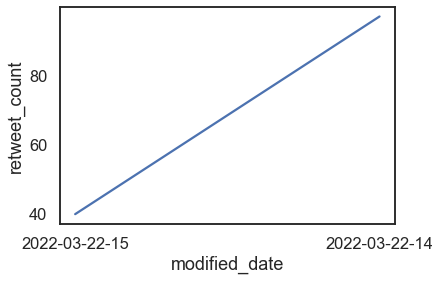

In [170]:
sns.lineplot(data = df, x="modified_date", y="retweet_count", ci = None) # unfortunately the graph doesn't show much since the range of dates is too narrow